In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [3]:
lung_cancer_dataset = pd.read_csv(r'C:\Users\kenneth\OneDrive\Desktop\Disease Prediction\Disease-Prediction\datasets\survey lung cancer.csv')

In [4]:
lung_cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
lung_cancer_dataset.shape

(309, 16)

In [6]:
lung_cancer_dataset.info

<bound method DataFrame.info of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1    

In [7]:
lung_cancer_dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
lung_cancer_dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [9]:
lung_cancer_dataset.duplicated().sum()

33

In [10]:
lung_cancer_dataset.drop_duplicates(inplace = True)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
lung_cancer_dataset['LUNG_CANCER'] = encoder.fit_transform(lung_cancer_dataset['LUNG_CANCER'])
lung_cancer_dataset['GENDER'] = encoder.fit_transform(lung_cancer_dataset['GENDER'])


In [12]:
lung_cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [13]:
X = lung_cancer_dataset.drop(columns = 'LUNG_CANCER', axis = 1)
Y = lung_cancer_dataset['LUNG_CANCER']

In [14]:
#to make the columns have values 1 and 0 instead of 2 and 1
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size= 0.2, random_state = 1, stratify = Y)

In [17]:
print(X_train.shape)
print(Y_train.shape)

(220, 15)
(220,)


In [18]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("The mean squared error : ", mse)

The mean squared error :  0.11218163314310826


In [19]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("The mean squared error is : ", mse)

The mean squared error is :  0.14285714285714285


c:\Users\kenneth\anaconda3\envs\tf2new\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, Y_train)

In [21]:
Y_pred = knn_model.predict(X_test)
Y_pred_accuracy_score = accuracy_score(Y_test, Y_pred)
print("The accuracy score of the model is : ", Y_pred_accuracy_score)

The accuracy score of the model is :  0.7857142857142857


In [22]:
#tuning the model
knn_params = {"n_neighbors": np.arange(1,50)}
knn_tuned = GridSearchCV(knn, knn_params, cv = 10)
knn_tuned.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [23]:
Y_pred_tuned = knn_tuned.predict(X_test)
Y_pred_accuracy_score_tuned = accuracy_score(Y_test, Y_pred_tuned)
print("The accuracy score of the model is : ", Y_pred_accuracy_score_tuned)

The accuracy score of the model is :  0.7678571428571429


In [24]:
#using SVM model
from sklearn import svm
model_svm = svm.SVC(kernel = 'linear')
model_svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [25]:
Y_pred_svm = model_svm.predict(X_test)
Y_pred_accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("The accuracy of the model using SVM is : ", Y_pred_accuracy_svm)

The accuracy of the model using SVM is :  0.8392857142857143


In [26]:
#hypertuning the model
# Hyperparameter tuning using Grid Search with cross-validation
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
model_svm_tuned = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
model_svm_tuned.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [27]:
#evaluating the tuned model
Y_pred_svm_tuned = model_svm_tuned.predict(X_test)
Y_pred_svm_tuned_accuracy = accuracy_score(Y_test, Y_pred_svm_tuned)
print("The accuracy score of the svm tuned model is : ", Y_pred_svm_tuned_accuracy)

The accuracy score of the svm tuned model is :  0.8571428571428571


USING RANDOM FORESTS

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [31]:
Y_pred_rf = rf_model.predict(X_test)
Y_pred_rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print("The accuracy score of the model using RANDOM FOREST is : ", Y_pred_rf_accuracy)

The accuracy score of the model using RANDOM FOREST is :  0.8035714285714286


In [37]:
#hyperparameter tuning
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

rf_model_tuned = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_model_tuned.fit(X_train, Y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [44]:
rf_tuned = rf_model_tuned.best_estimator_
rf_tuned.fit(X_train, Y_train)

In [45]:
Y_pred_rf_tuned = rf_tuned.predict(X_test)
Y_pred_rf_tuned_accuracy = accuracy_score(Y_test, Y_pred_rf_tuned)
print("The accuracy score of the tuned model using RANDOM FOREST is : ", Y_pred_rf_tuned)

The accuracy score of the tuned model using RANDOM FOREST is :  [1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


USING DECISION TRESS

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [64]:
Y_pred_dtc = dtc_model.predict(X_test)
Y_pred_dtc_accuracy = accuracy_score(Y_test, Y_pred_dtc)
print("The accuracy of the model using DECISION TREES IS : ", Y_pred_dtc_accuracy)

The accuracy of the model using DECISION TREES IS :  0.8392857142857143


<Axes: >

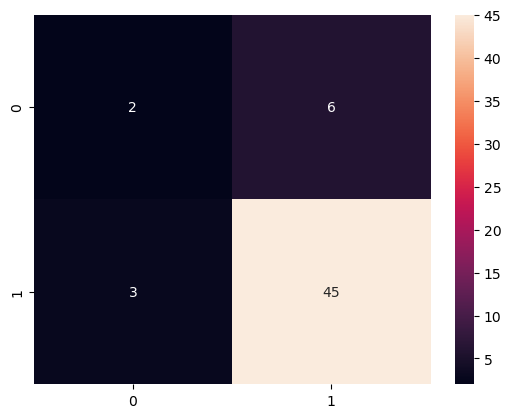

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(Y_test, Y_pred_dtc)
import seaborn as sns
sns.heatmap(cf_matrix, annot = True)

In [73]:
#checking with input data
input_data = (1,59,0,0,0,0,0,0,0,0,0,0,0,0,0)

#changing the data to numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the data
input_data_reshaped = input_data_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

[0]


c:\Users\kenneth\anaconda3\envs\tf2new\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
